In [1]:
import pandas as pd
# import Numpy
import numpy as np
# import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
stroke = pd.read_csv("C:/Users/Admin/Downloads/Stroke_Data.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [31]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Age Distribution of Data')

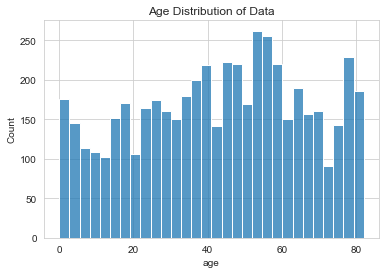

In [15]:
sns.histplot(x = 'age',data = stroke, bins = 30)
plt.title("Age Distribution of Data")

<AxesSubplot:>

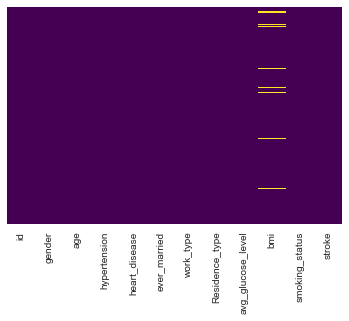

In [16]:
sns.heatmap(stroke.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [27]:
women = stroke[stroke['gender'] == 'Female']
men = stroke[stroke['gender'] == 'Male']

In [28]:
women.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,2994.000000,2994.000000,2994.000000,2994.000000,2994.000000,2897.000000,2994.000000
mean,36479.685037,43.757395,0.092184,0.037742,104.057809,29.065758,0.047094
std,21176.443056,21.966561,0.289334,0.190604,43.590651,8.110783,0.211876
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17796.500000,27.000000,0.000000,0.000000,76.432500,23.400000,0.000000
50%,37093.000000,44.000000,0.000000,0.000000,90.755000,27.800000,0.000000
75%,54310.000000,61.000000,0.000000,0.000000,112.182500,33.500000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,267.760000,78.000000,1.000000


In [29]:
men.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.00000,2011.000000,2115.000000
mean,36562.541371,42.483385,0.104965,0.077069,109.08852,28.647936,0.051064
std,21146.470229,23.484066,0.306580,0.266763,47.43484,7.464493,0.220180
min,84.000000,0.080000,0.000000,0.000000,55.22000,11.500000,0.000000
25%,17695.500000,22.000000,0.000000,0.000000,78.37000,24.000000,0.000000
50%,36666.000000,46.000000,0.000000,0.000000,93.55000,28.400000,0.000000
75%,55194.500000,61.000000,0.000000,0.000000,117.73000,32.500000,0.000000
max,72882.000000,82.000000,1.000000,1.000000,271.74000,97.600000,1.000000


In [42]:
Child = stroke[stroke['age'] < 16]
Adult = stroke[(stroke['age'] >= 16) & stroke['age'] < 65 ]
Senior = stroke[stroke['age'] >= 65]

In [46]:
Child.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  17
smoking_status        0
stroke                0
dtype: int64

In [43]:
Child.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,744.000000,744.000000,744.0,744.000000,744.000000,727.000000,744.000000
mean,36011.225806,7.360215,0.0,0.001344,94.641089,20.467675,0.002688
std,21112.806022,4.724440,0.0,0.036662,27.720980,4.938075,0.051813
min,77.000000,0.080000,0.0,0.000000,55.340000,10.300000,0.000000
25%,16797.250000,3.000000,0.0,0.000000,75.857500,17.250000,0.000000
50%,35526.500000,7.000000,0.0,0.000000,89.290000,19.100000,0.000000
75%,54351.750000,12.000000,0.0,0.000000,109.105000,22.600000,0.000000
max,72940.000000,15.000000,0.0,1.000000,233.710000,48.800000,1.000000


In [44]:
Adult.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [45]:
Senior.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,953.000000,1027.000000
mean,35698.608569,73.968841,0.223953,0.175268,123.919279,29.557083,0.154820
std,21409.670276,5.337626,0.417094,0.380381,59.478357,5.771596,0.361909
min,132.000000,65.000000,0.000000,0.000000,55.230000,11.300000,0.000000
25%,16531.500000,69.000000,0.000000,0.000000,79.560000,25.900000,0.000000
50%,35333.000000,75.000000,0.000000,0.000000,97.900000,28.900000,0.000000
75%,54332.500000,79.000000,0.000000,0.000000,184.840000,32.900000,0.000000
max,72823.000000,82.000000,1.000000,1.000000,271.740000,54.600000,1.000000


In [50]:
Heart = stroke[stroke['heart_disease'] == 1]
No_Heart = stroke[stroke['heart_disease'] == 0]

In [51]:
Heart.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,276.000000,276.000000,276.000000,276.0,276.000000,243.000000,276.00000
mean,36403.068841,68.188406,0.231884,1.0,136.818768,30.316461,0.17029
std,21421.764865,11.613504,0.422802,0.0,62.823103,5.290212,0.37657
min,239.000000,2.000000,0.000000,1.0,56.310000,19.100000,0.00000
25%,16580.000000,61.000000,0.000000,1.0,83.430000,26.700000,0.00000
50%,37794.000000,71.000000,0.000000,1.0,106.545000,29.800000,0.00000
75%,54502.500000,78.000000,0.000000,1.0,201.872500,33.000000,0.00000
max,72715.000000,82.000000,1.000000,1.0,271.740000,54.700000,1.00000


In [52]:
No_Heart.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4834.000000,4834.000000,4834.000000,4834.0,4834.000000,4666.000000,4834.000000
mean,36524.381671,41.801407,0.089781,0.0,104.396494,28.819117,0.041787
std,21149.000814,22.254067,0.285897,0.0,43.432070,7.958442,0.200124
min,67.000000,0.080000,0.000000,0.0,55.120000,10.300000,0.000000
25%,17800.000000,24.000000,0.000000,0.0,76.942500,23.400000,0.000000
50%,36898.500000,43.000000,0.000000,0.0,91.265000,27.900000,0.000000
75%,54682.000000,59.000000,0.000000,0.0,112.540000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,0.0,267.760000,97.600000,1.000000


In [53]:
CHM = stroke[(stroke['age'] < 16) & (stroke['heart_disease'] == 1) & (stroke['gender'] == 'Male')]
CHF = stroke[(stroke['age'] < 16) & (stroke['heart_disease'] == 1) & (stroke['gender'] == 'Female')]
CNM = stroke[(stroke['age'] < 16) & (stroke['heart_disease'] == 0) & (stroke['gender'] == 'Male')]
CNF = stroke[(stroke['age'] < 16) & (stroke['heart_disease'] == 0) & (stroke['gender'] == 'Female')]
AHM = stroke[(stroke['age'] >= 16) & (stroke['age'] < 65) & (stroke['heart_disease'] == 1) & (stroke['gender'] == 'Male')]
AHF = stroke[(stroke['age'] >= 16) & (stroke['age'] < 65) & (stroke['heart_disease'] == 1) & (stroke['gender'] == 'Female')]
ANM = stroke[(stroke['age'] >= 16) & (stroke['age'] < 65) & (stroke['heart_disease'] == 0) & (stroke['gender'] == 'Male')]
ANF = stroke[(stroke['age'] >= 16) & (stroke['age'] < 65) & (stroke['heart_disease'] == 0) & (stroke['gender'] == 'Female')]
SHM = stroke[(stroke['age'] >= 65) & (stroke['heart_disease'] == 1) & (stroke['gender'] == 'Male')]
SHF = stroke[(stroke['age'] >= 65) & (stroke['heart_disease'] == 1) & (stroke['gender'] == 'Female')]
SNM = stroke[(stroke['age'] >= 65) & (stroke['heart_disease'] == 0) & (stroke['gender'] == 'Male')]
SNF = stroke[(stroke['age'] >= 65) & (stroke['heart_disease'] == 0) & (stroke['gender'] == 'Female')]

## Fixing Sample Size

<AxesSubplot:xlabel='stroke', ylabel='count'>

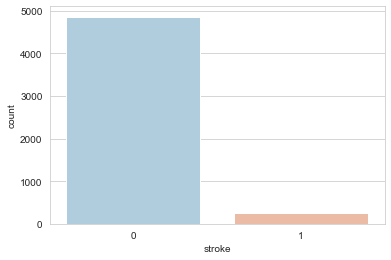

In [18]:
sns.countplot(x='stroke',data=stroke,palette='RdBu_r')

In [30]:
stroke.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [34]:
q = 0.2
oversampling_size = (int)(((4861+249)*q - 249)/(1 - q))
print(oversampling_size)
to_resample = stroke[stroke['stroke'] == 1]
# sampling with replacement
our_resample = to_resample.sample(n = oversampling_size, 
                                 replace = True)
# to concatenate two DataFrames
stroke_rebal = pd.concat([stroke, our_resample])

966


In [35]:
stroke_rebal['stroke'].value_counts()

0    4861
1    1215
Name: stroke, dtype: int64